In [1]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from joblib import dump
import matplotlib.pyplot as plt

In [2]:
# Load dataset
# df = pd.read_csv("../data/reviews-short.csv")
df = pd.read_csv("../data/reviews.csv")

In [3]:
# Preprocess reviews
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

def preprocess_text(text):
    # Removing punctuations
    text = re.sub(r'\W', ' ', str(text))
    # Converting text to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords using inbuild library function
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatization of words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Stiching back to form a sentence
    return ' '.join(tokens)

df['processed_reviews'] = df['Review'].apply(preprocess_text)

In [4]:
# Convert labels into sentiment categories
def label_to_sentiment(label):
    if label <= 2:
        return 'negative'
    elif label == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['Label'].apply(label_to_sentiment)

In [5]:
# Feature Extraction
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['processed_reviews']).toarray()
y = df['sentiment']

# Save the TfidfVectorizer
dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Saving the model
dump(model, 'sheep_two.joblib')

['sheep_two.joblib']

              precision    recall  f1-score   support

    negative       0.71      0.39      0.51      1095
     neutral       0.35      0.08      0.13      1168
    positive       0.94      0.99      0.97     25801

    accuracy                           0.93     28064
   macro avg       0.67      0.49      0.53     28064
weighted avg       0.91      0.93      0.91     28064



<Figure size 800x600 with 0 Axes>

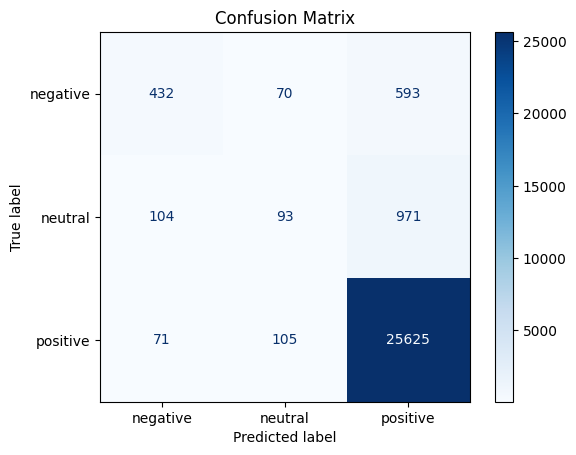

In [8]:
# Evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

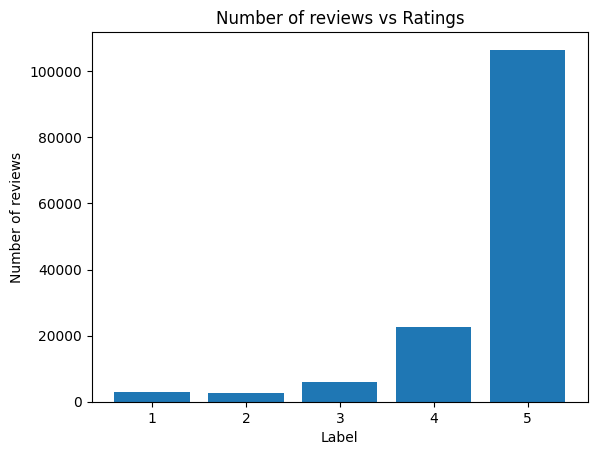

In [9]:
# Group by label
label_counts = df.groupby("Label").size()

# Plotting
plt.bar(label_counts.index, label_counts.values)

# Adding labels and titles
plt.xlabel("Label")
plt.ylabel("Number of reviews")
plt.title("Number of reviews vs Ratings")

plt.show()

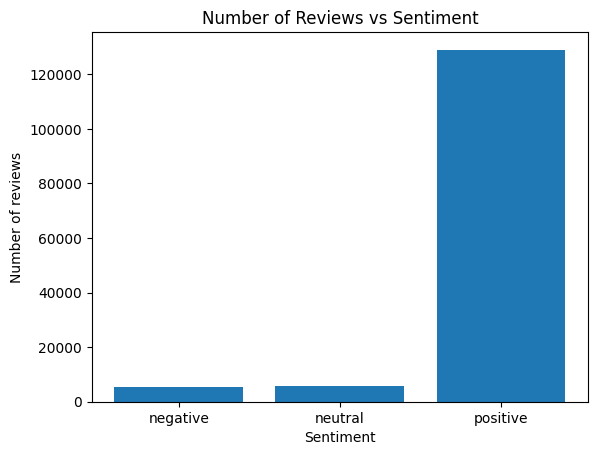

In [10]:
# Group by sentiment
sentiment_counts = df.groupby("sentiment").size()

# Plotting
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Adding labels and titles
plt.xlabel("Sentiment")
plt.ylabel("Number of reviews")
plt.title("Number of Reviews vs Sentiment")

plt.show()